<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-d0a9b3af8ed0>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Familiarize myself with the dataset

In [6]:
boston_df = pd.read_csv(boston_url)

In [7]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

# 1. Boxplot for Median value of owner-occupied homes

[Text(0.5, 0, ''), Text(0, 0.5, 'median value in $1000')]

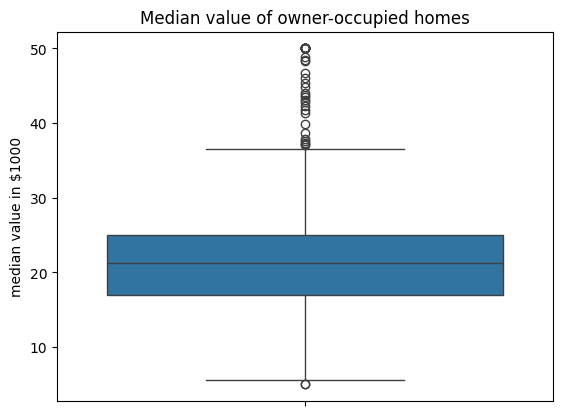

In [8]:
plot1 = sns.boxplot(y = "MEDV", data = boston_df)
plot1.set_title("Median value of owner-occupied homes")
plot1.set(xlabel='', ylabel='median value in $1000')

In [10]:
import statistics

print(statistics.median(boston_df["MEDV"]))

21.2


#### Explanation: Boxplot shows median value of the owner occupied homes ($21 200) with the distribution and outliers.

# 2. Bar plot of the "Charles River variable"

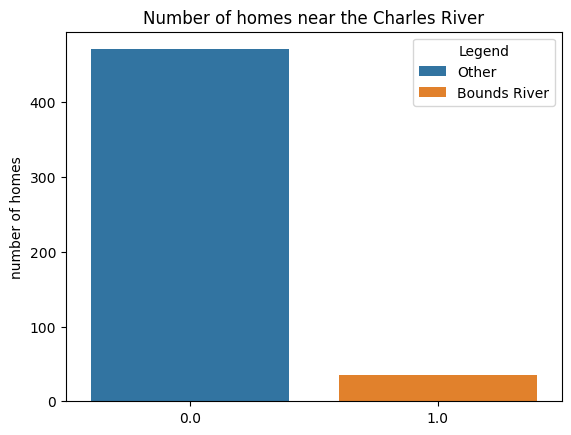

In [11]:
plot2 = sns.countplot(x = "CHAS", hue='CHAS', dodge=False, data = boston_df)
plot2.set_title("Number of homes near the Charles River")
plot2.set(xlabel='', ylabel='number of homes')
plot2.legend(labels=["Other","Bounds River"], title="Legend")

#### Explanation: The bar plot shows that the majority of the houses are not next to the Charles River.

# 3. Box plot comparing median value of owner-occupied homes and age groups

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = 'Up to 35 years'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

[Text(0.5, 0, 'Median value in $1000'), Text(0, 0.5, 'Age groups')]

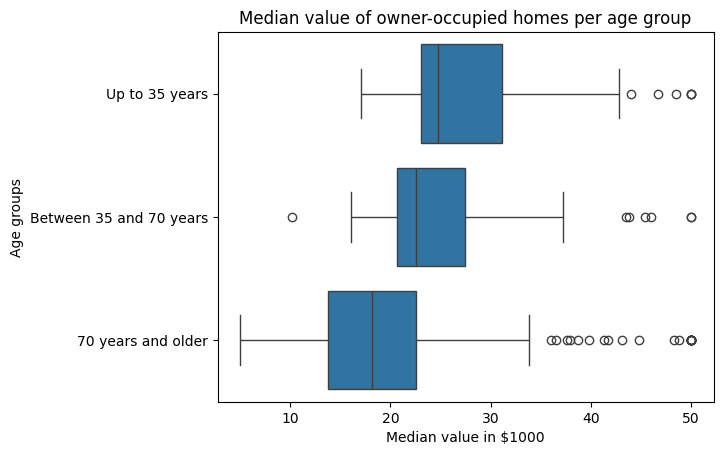

In [13]:
plot3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df, order = ["Up to 35 years", "Between 35 and 70 years", "70 years and older"])
plot3.set_title('Median value of owner-occupied homes per age group')
plot3.set(xlabel='Median value in $1000', ylabel='Age groups')

#### Explanation: The boxplot shows that the median value of the owner occupied homes decreases with the age of the owner. In essence, the older the owner, the lower the value of the home.

# 4. Scatter plot of relationship between Nitric oxide concentration and the proportion of non-retail business acres per town

[Text(0.5, 0, 'Non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentration')]

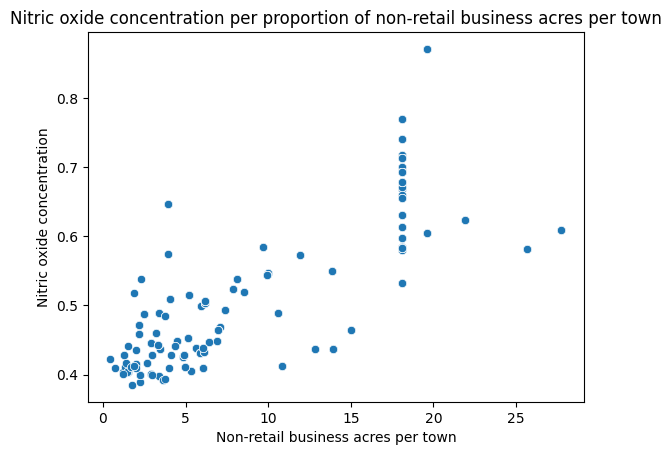

In [14]:
plot4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
plot4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')
plot4.set(xlabel='Non-retail business acres per town', ylabel='Nitric oxide concentration')

#### Explanation: There is a relationship between non-retail business acres per town and the nitric oxide concentration. In a nutshell, the towns with lower amount of non-retail business acres have lower nitric oxide concentrations.

# 5. Histogram of pupil to teacher ratio

[Text(0.5, 0, 'Binned samples'), Text(0, 0.5, 'Pupil to teacher ratio')]

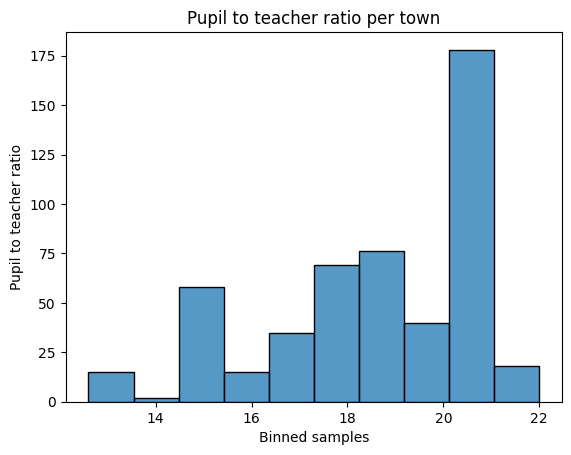

In [16]:
plot5 = sns.histplot(x = 'PTRATIO', data = boston_df, bins=10)
plot5.set_title('Pupil to teacher ratio per town')
plot5.set(xlabel='Binned samples', ylabel='Pupil to teacher ratio')

#### Explanation: Pupil to teacher ratio differs significantly per different samples. There is a slight trend of higher number of pupil per sample.

# 6. T-test to determine significance of difference of median values of houses bounded by the Charles river

#### null hypothesis: there is no significant difference in median value of houses bounded and not bounded by the Charles River

#### alternative hypothesis: there is a significant difference in median value of houses bounded and not bounded by the Charles River

In [17]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years,FAR


In [18]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### The p value is less than 0.05. Hence, we reject the null hypothesis. This means that there is a significant difference in median values of houses bounded and not bounded by the Charles River.

# 7. ANOVA to determine if the median value of the house differs for each age group

#### Null hypothesis: there is no significant difference in median value of houses per age group

#### Alternative hypothesis: there is a significant difference in median value of houses per age group

In [33]:
youngest = boston_df[boston_df['Age_Group'] == 'Up to 35 years']['MEDV']
middle = boston_df[boston_df['Age_Group'] == 'Between 35 and 70 years']['MEDV']
oldest = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

In [34]:
#test for equality of variance
scipy.stats.levene(youngest, middle, oldest, 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [35]:
f_statistic, p_value = scipy.stats.f_oneway(youngest, middle, oldest)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Explanation: The p value is less than 0.05. Hence, we reject the null hypothesis. This means that there is a statistically significant difference in median value of houses per age group.

# 8. Pearson correlation to determine relationship between nitric oxide concentration and proportion of non-retail business acres per town

#### Null hypothesis: there is no significant relationship of nitric oxide concentration and proportion of non-retail business acres per town

#### Alternative hypothesis: there is a significant relationship of nitric oxide concentration and proportion of non-retail business acres per town

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Explanation: The p value is less than 0.05. Hence, we reject the null hypothesis. This means that there is a significant relationship of nitric oxide and proportion of non-retail business acres per town.

# 9. Regression analysis to show impact of distance of Boston employment centres on median value of owner-occupied homes

#### Null hypothesis: there is no significant impact of distance of Boston employment centres on median value of owner-occupied homes

#### Alternative hypothesis: there is a significant impact of distance of Boston employment centres on median value of owner-occupied homes

In [36]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
prediction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        16:16:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Explanation: The p value is less than 0.05. Hence, we reject the null hypothesis. Based on the coefficient 1.0916, we can conclude that the distance to employment centers increases the value of owner occupied homes by 1.0916.